3.선형SVM_소프트마진분류

Contents
<div id ="toc"></div>

# 1. 소프트 마진 분류

## 1.1. 하드 마진 분류의 한계

- 붓꽃 데이터 IRIS에 대해 하드 마진 분류를 시도하더라도 하드 마진 분류가 실질적으로 진행되지 않는다.
<img src="img/ch3_1.png" width="50%">

## 1.2. 소프트 마진 (Soft Margin) 분류

- 이러한 경우에는 **어느 정도의 오류를 허용**하면서 가급적 최대 마진이 되는 초평면을 찾는다.
    - 이와 같이 소프트 마진 분류를 수행하는 선형 SVM을 **서포트 벡터 분류기(support vector classifier)** 라고 한다.
- 잘못 분류되는 데이터가 있지만 초평면을 찾을 수 있다.
- 과대적합을 방지하거나 줄일 수 있다.
<img src="img/ch3_2.png" width="50%">

- 하이퍼파라미터 <span class="mark">C(cost)</span>를 이용하여 허용할 오류의 수준을 결정한다.
- 즉, **"원래 데이터와 다른 클래스로 분류되는 경우를 얼마나 많이 허용할 것인가"** 를 조정하는 규제 값이다.

※ 매개변수 C는 이론적으로 소프트 마진 분류를 위해 도입된 여유 변수(slack variable) ξ 의 값에 적용되는 변수이다.

- C의 값이 **높은 경우**, 오류에 대해서 더 엄격하게 적용한다.
    - 마진이 작아진다.
    - 오분류율이 낮아진다.
    - 과대적합이 될 수 있다.
<img src="img/ch3_3.png" width="50%">

- C의 값이 낮은 경우, 오류에 대해서 덜 엄격하게 적용한다.
    - 마진이 커진다.
    - 오분류율이 높아진다.
    - 과소적합이 될 수 있다.
<img src="img/ch3_4.png" width="50%">

## 1.3. 사이킷런으로 선형 SVM (소프트 마진) 분류 수행

1. **svm** 모듈에 있는 **LinearSVC**를 또는 **SVC**를 이용하여 선형 SVM 객체를 생성한다.
    - 매개변수 **C**는 공통적으로 사용되며, <span class="mark">허용할 오류의 정도</span>를 결정하는 하이퍼파라미터 값이다.
    - 매개변수 **loss**는 <span class="mark">LinearSVC에서만</span> 사용되는 손실 함수 이름이다. <span class="mark">기본값은 'squared_hinge'</span> 이며, 필요하다면 'hinge' 로 변경한다.
    - 매개변수 **kernel**은 <span class="mark">SVC에서만</span> 사용되는 커널 트릭의 이름이다. 기본값은 'rbf' 이며, 선형 SVM에서는 'linear' 로 변경하여 적용한다.

In [2]:
import sklearn.svm as svm

clf =svm.SVC(C=1, kernel='linear')

※ 아래와 같이 LinearSVC에서 loss=‘hinge’로 설정하여 생성해도 의미적으로는 동일하지만, 적용된 구현 기법이 SVC와 다소 다르기 때문에 완전히 똑같은 결과가 나오지는 않는다.
```python
cvf = svm.LinearSVC(C=1, loss='hinge')
```

2. 선형 SVM 객체에 대하여 **fit** 메소드를 이용하여 훈련한다.   
    (붓꽃 데이터를 이용하였으며, 훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용하였다.)

In [5]:
import sklearn.datasets as d
import numpy as np

iris = d.load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 2).astype(np.int)

clf.fit(X,y)

SVC(C=1, kernel='linear')

3. 실행 객체 또는 분류 모형에 대하여 **predict** 메소드를 이용하여 예측을 수행한다.

In [9]:
X_test1 = [[5.5, 1.9]]
clf.predict(X_test1)

array([1])

In [10]:
X_test2 = [[4.7, 1.8]]
clf.predict(X_test2)

array([0])

4. **accuracy_score** 함수 또는 **score** 메소드를 이용하여 정확도를 구한다.

**score**
```python
clf.score(X, y)
```  
   
  
**accuracy_score**
```python
import sklearn.metrics as mt

mt.accuracy_score(y_test, y_pred)
```

- 매개변수 C의 값을 변화시키면 마진의 너비가 달라지고, 이에 따라 분류 결과도 달라지는 것을 확인할 수 있다.
<img src="img/ch3_5.png" width="50%">
<img src="img/ch3_6.png" width="50%">

# 2. 다중 클래스 분류

## 2.1. 다중 클래스 분류 (Multi-class Classification)

- **다중 클래스 분류(multi-class classification)** 는 말 그대로, 두 종류가 아닌 여러 개의 클래스를 분류하는 것을 의미한다.
- **다항 분류(multinomial classification)** 라고도 한다.


- 분석 기법에 따라서 이진 분류만 가능한 경우도 있고, 다항분류까지 가능한 경우도 있다.
- 이진 분류만 가능한 방법이라도 이진 분류기 자체를 여러 개 조합하여 다항 분류를 수행할 수 있다.

## 2.2. OvO (One-Vs-One) 전략

- K개 클래스에 대하여 2개의 클래스 조합을 선택하여 분류하는 과정을 모든 조합에 대해서 수행한다.
- 각 분류를 통해서 판별된 결과를 기반으로 가장 많은 결과값을 획득한 클래스를 최종 결과로 선택한다.
<img src="img/ch3_7.png" width="50%">

## 2.3. OvA 또는 OvR (One-Vs-All 또는 One-Vs-Rest) 전략

- K개 클래스에 대하여 각 클래스 별로 소속 여부를 판별하는 분류를 수행한다.
- 각 분류를 통해서 판별된 결과를 기반으로 가장 많은 결과값을 획득한 클래스를 최종 결과로 선택한다.
<img src="img/ch3_8.png" width="50%">

## 2.4. 실습 - 선형 SVM의 다중 클래스 분류

- SVM은 기본적으로 이진 분류기이지만, OvO 전략을 적용하여 다항 분류를 수행할 수 있다.
- 별도의 설정은 필요 없으며, 데이터가 다중 클래스로 구성되어 있으면 자동적으로 OvO 방식으로 분류가 수행된다.
    - 아래의 경우, y는 ‘setosa’, ‘versicolor’, ‘virginica’의 3종이 존재하므로 다중 클래스이다.

※ LinearSVC는 OvO 전략 사용 안함

In [73]:
import sklearn.datasets as d

iris = d.load_iris()
X = iris.data[:, (2, 3)]
y = iris.target

- 이후의 과정은 이진 분류의 경우와 동일하게 진행하면 된다.

In [74]:
import sklearn.svm as svm
import sklearn.model_selection as ms
import sklearn.metrics as mt

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=0)

clf = svm.SVC(kernel='linear').fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = mt.accuracy_score(y_test, y_pred)
print('정확도 :', round(score, 3))

정확도 : 0.978


---

**점수**

In [87]:
# 정확도
clf.score(X_test, y_test), mt.accuracy_score(y_test, y_pred)

(0.9777777777777777, 0.9777777777777777)

In [91]:
# 분류 평가표
print(mt.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**그래프 그리기**

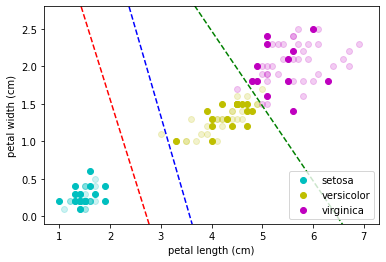

In [109]:
import matplotlib.pyplot as plt

l_set = iris.target_names
c_set = ['c','y','m']
c_set2 = ['r','b','g']

for t in set(y_train):
    X_pts = [X_train[i, 0] for i in range(len(y_train)) if y_train[i] == t]
    y_pts = [X_train[i, 1] for i in range(len(y_train)) if y_train[i] == t]
    plt.scatter(X_pts, y_pts, c = c_set[t], alpha = 0.2)

for t in set(y_pred):
    X_pts = [X_test[i, 0] for i in range(len(y_pred)) if y_pred[i] == t]
    y_pts = [X_test[i, 1] for i in range(len(y_pred)) if y_pred[i] == t]
    plt.scatter(X_pts, y_pts, c = c_set[t], label = l_set[t])

    
xx = np.linspace(1, 7)
for i in range(len(clf.coef_)):
    yy = (-(clf.coef_[i][0]/clf.coef_[i][1]))*xx - clf.intercept_[i]/clf.coef_[i][1]
    plt.plot(xx, yy, linestyle = '--', c = c_set2[i])

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.legend(loc='lower right')
plt.ylim(-0.1, 2.8)
plt.show()

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>